In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

torch.set_default_dtype(torch.float32)

Using cpu device


In [3]:
filename = '../data/winequality-white.csv'

In [20]:
class CustomDataset(Dataset):
    def __init__(self, filename, first, last):
        self.data = torch.tensor(np.genfromtxt(filename, delimiter=';', skip_header=1)[first:last], dtype=torch.float32) # use None if till last element
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx, :11], self.data[idx, 11]

In [64]:
len(range())

SyntaxError: invalid syntax (1289461151.py, line 1)

In [156]:
b_size = 4
train_data = CustomDataset(filename, 0, 3000)
test_data = CustomDataset(filename, 3001, None)
train_dataloader = DataLoader(train_data, batch_size=b_size, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=True)
Xtest, Ytest = next(iter(test_dataloader))

In [157]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(11, 50),
            nn.ReLU(),
            nn.Linear(50, 1),
        )
    
    def forward(self, x):
        return self.mlp(x).view(-1)


In [158]:
model = NN()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.0)
loss_fn = nn.MSELoss()

In [159]:
loss_train = [] 
loss_test = []
epochs = 150

In [160]:
for epoch in range(epochs):
    lossi = []
    for i, (X, y) in enumerate(train_dataloader):
        ypred = model(X)
        loss = loss_fn(ypred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        lossi.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch:{epoch}/{epochs}: {sum(lossi)/len(lossi)}")
        with torch.no_grad():
            ypred_test = model(Xtest)
        print(f"Testloss: {loss_fn(ypred_test, Ytest)}")

Epoch:0/150: 134.4278924790919
Testloss: 4.709409713745117
Epoch:10/150: 0.7275797982911268
Testloss: 0.6036234498023987
Epoch:20/150: 0.6703352822959423
Testloss: 0.5759178996086121
Epoch:30/150: 0.6435696590120594
Testloss: 0.5984406471252441
Epoch:40/150: 0.623016799390316
Testloss: 0.5521013140678406
Epoch:50/150: 0.6162471341192722
Testloss: 0.5816754102706909
Epoch:60/150: 0.6055939343894522
Testloss: 0.5908671021461487
Epoch:70/150: 0.5947153967519602
Testloss: 0.5605717301368713
Epoch:80/150: 0.587857859544456
Testloss: 0.5801915526390076
Epoch:90/150: 0.5862871151591341
Testloss: 0.5912454724311829
Epoch:100/150: 0.5813813696031769
Testloss: 0.5497305393218994
Epoch:110/150: 0.5785521975941956
Testloss: 0.564838171005249
Epoch:120/150: 0.578428006576995
Testloss: 0.5813362002372742
Epoch:130/150: 0.5792793353224794
Testloss: 0.5525214076042175
Epoch:140/150: 0.5776092816491921
Testloss: 0.5469186305999756


Text(0.5, 1.0, 'Correlation: 0.521767481819228')

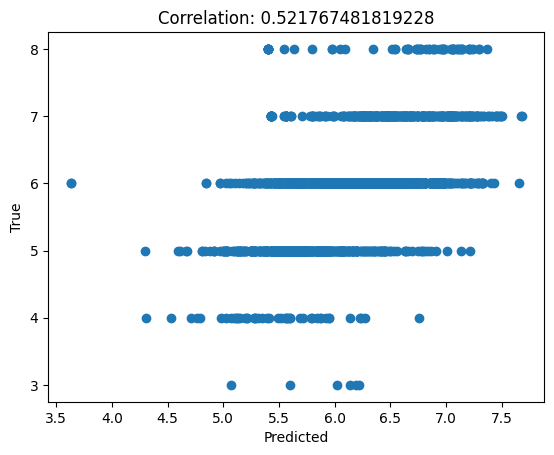

In [161]:
Ypred = model(Xtest)
cctest = np.corrcoef(Ypred.detach().numpy(), Ytest.detach().numpy())[0, 1]
plt.scatter(Ypred.detach().numpy(), Ytest.detach().numpy())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Correlation: {cctest}")

In [276]:
Ypred.detach().numpy()

array([[6.109742 ],
       [5.9030733],
       [6.456876 ],
       ...,
       [5.3361454],
       [6.584468 ],
       [6.2355466]], dtype=float32)